In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import math

In [2]:
#载入数据集
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [30]:
tf.reset_default_graph()
#batch_size
batch_size = 128
#计算批次
n_batch = math.ceil(mnist.train.num_examples / batch_size)

#placeholder
x = tf.placeholder(tf.float32,[None,784]) #28*28=784
y = tf.placeholder(tf.float32,[None,10]) #28*28=784
drop_rate = tf.placeholder_with_default(0.2,None)

#784-400-150-10神经网络
wL1 = tf.Variable(tf.truncated_normal([784,400]))
bL1 = tf.Variable(tf.zeros([400]))
mL1 = tf.matmul(x,wL1) + bL1
rL1 = tf.nn.sigmoid(mL1)
rL1 = tf.nn.dropout(rL1,rate=drop_rate)

wL2 = tf.Variable(tf.truncated_normal([400,150]))
bL2 = tf.Variable(tf.zeros([150]))
mL2 = tf.matmul(rL1,wL2) + bL2
rL2 = tf.nn.sigmoid(mL2)
rL2 = tf.nn.dropout(rL2,rate=drop_rate)

wL3 = tf.Variable(tf.truncated_normal([150,10]))
bL3 = tf.Variable(tf.zeros([10]))
logits = tf.matmul(rL2,wL3) + bL3
prediction = tf.nn.softmax(logits)

#代价函数
mean_square_error = tf.reduce_mean(tf.square(prediction - y))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y,logits))

#梯度下降法
mse_train = tf.train.GradientDescentOptimizer(0.1).minimize(mean_square_error)
ce_train = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

#结果存在一个布尔型列表中。m*1
predictionIndex = tf.argmax(prediction,1)
realIndex = tf.argmax(y,1)
correct_prediction = tf.equal(predictionIndex,realIndex)

#求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [31]:
def train(mnist,epoch,batch_size,loss_node,train_node,name,train_rate,test_rate):
    loss_list = []
    range_list = []
    accuracy_list = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for loop in range(epoch):
            for batch in range(n_batch):
                batch_xs,batch_ys = mnist.train.next_batch(batch_size)
                _,loss_value,accuracy_value = sess.run([train_node,loss_node,accuracy],feed_dict={x:batch_xs,y:batch_ys,drop_rate:train_rate})
                loss_list.append(loss_value)
                range_list.append(len(range_list))
                accuracy_list.append(accuracy_value)
            else: 
                test_acc = sess.run(accuracy,feed_dict = {x:mnist.test.images,y:mnist.test.labels,drop_rate:test_rate})
                train_acc = sess.run(accuracy,feed_dict = {x:mnist.train.images,y:mnist.train.labels,drop_rate:test_rate})
                print("name = {}, loop = {}, test_acc = {},  train_acc = {}".format(name,loop,test_acc,train_acc))
    return range_list,loss_list,accuracy_list

In [33]:
ce_range_list,ce_loss_list,ce_accuracy_list = train(mnist,20,batch_size,cross_entropy,ce_train,"CE",0.1,0)

name = CE, loop = 0, test_acc = 0.760200023651123,  train_acc = 0.7522181868553162
name = CE, loop = 1, test_acc = 0.8201000094413757,  train_acc = 0.8141636252403259
name = CE, loop = 2, test_acc = 0.8518999814987183,  train_acc = 0.8453090786933899
name = CE, loop = 3, test_acc = 0.8641999959945679,  train_acc = 0.8619999885559082
name = CE, loop = 4, test_acc = 0.8769999742507935,  train_acc = 0.8755454421043396
name = CE, loop = 5, test_acc = 0.882099986076355,  train_acc = 0.8817999958992004
name = CE, loop = 6, test_acc = 0.8899999856948853,  train_acc = 0.8878909349441528
name = CE, loop = 7, test_acc = 0.8945000171661377,  train_acc = 0.8917090892791748
name = CE, loop = 8, test_acc = 0.8978000283241272,  train_acc = 0.8966181874275208
name = CE, loop = 9, test_acc = 0.9007999897003174,  train_acc = 0.90052729845047
name = CE, loop = 10, test_acc = 0.902899980545044,  train_acc = 0.9026363492012024
name = CE, loop = 11, test_acc = 0.9081000089645386,  train_acc = 0.906363666057

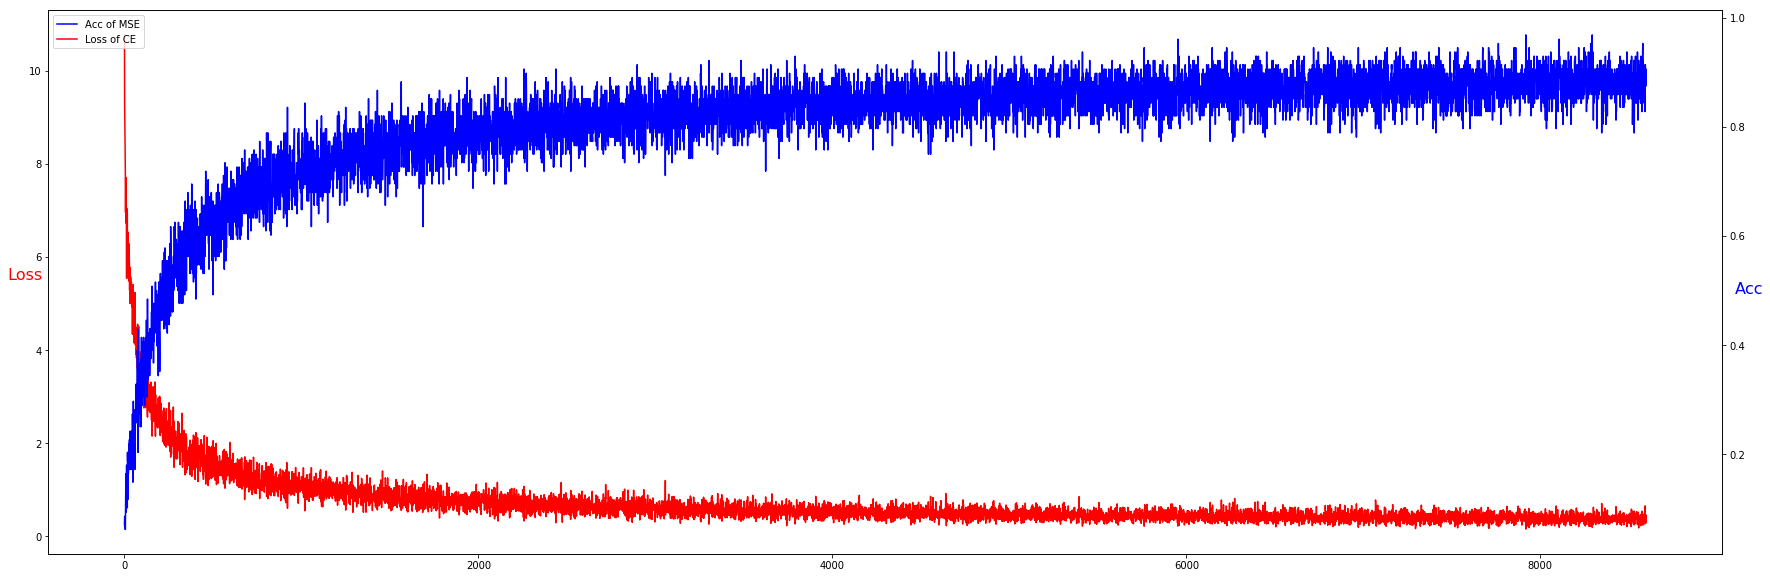

In [38]:
plt.figure(figsize=(30,10))
ce_loss_line, = plt.plot(ce_range_list,ce_loss_list,"r")
ax1 = plt.gca()
ax1.set_ylabel("Loss",fontsize=16,rotation=0,color='r')
ax2 = ax1.twinx()
ax2.set_ylabel("Acc",fontsize=16,rotation=0,color='b')
ce_acc_line, = ax2.plot(ce_range_list,ce_accuracy_list,"b")
plt.legend([ce_acc_line,ce_loss_line],["Acc of MSE","Loss of CE"],loc=2)
plt.show()